In [ ]:
import numpy as np
import pandas as pd
import io

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving amazon_indeed_review.csv to amazon_indeed_review.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['amazon_indeed_review.csv']), encoding = "ISO-8859-1")
df.head(3)

,rating,title,description,job_title
0,4.0,"Good money, a job not a career",I worked night shift so it;s tough to get accl...,Picker
1,1.0,Terrible place to work in and only recommend i...,Working as a warehouse associate for Amazon is...,Warehouse Associate
2,4.0,It's okay,If your gonna work here work flex other wise t...,Amazon Fulfillment Associate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


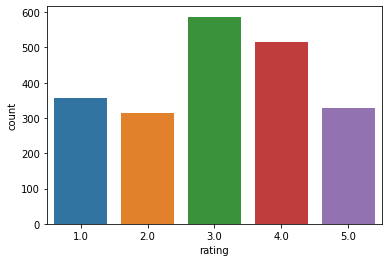

In [ ]:
import seaborn as sns
sns.countplot(df['rating'])

In [ ]:
df.shape

(2100, 4)

## Checking For Null Values

In [ ]:
df.isnull().sum()

rating         0
title          1
description    2
job_title      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().any()

False

## NLTK

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk import corpus

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet
      Unzipping corpora/wordnet.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Data Preprocessing

In [ ]:
import string
import re
from nltk.stem import WordNetLemmatizer
clean = re.compile('<.*?>')
#ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
lem = WordNetLemmatizer()

def cleanText(text):
    html = re.sub(clean,'',text)
    p_text = ''.join([i.lower() for i in html if i not in string.punctuation])
    token = re.split('\W+',p_text)
    #stop = [ps.stem(i) for i in token if i not in stopwords]
    stop = [lem.lemmatize(i) for i in token if i not in stopwords]
    sent = ' '.join(stop)
    return sent

In [ ]:
df_train = df.copy()

In [ ]:
df_train['refined review'] = df['description'].apply(lambda x : cleanText(x))
df_train.head()

,rating,title,description,job_title,refined review
0,4.0,"Good money, a job not a career",I worked night shift so it;s tough to get accl...,Picker,worked night shift tough get acclimated schedu...
1,1.0,Terrible place to work in and only recommend i...,Working as a warehouse associate for Amazon is...,Warehouse Associate,working warehouse associate amazon one job acc...
2,4.0,It's okay,If your gonna work here work flex other wise t...,Amazon Fulfillment Associate,gonna work work flex wise ot peak suck work fl...
3,3.0,Hard and fast paced work,Donât work here if you are not up for non st...,Warehouse Worker,donâ work non stop working entire shift itâ ha...
4,4.0,I had a great time but YMMV,The teams at amazon have very little to do wit...,SDE Intern,team amazon little get drastically different e...


## Name Entity Recognition 

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
li_ne = []
for i in range(len(df_train)):
  doc = nlp(df_train.iloc[i, 4])
  li_ne.append([(X.text, X.label_) for X in doc.ents])

In [ ]:
li_ne[1000]

[('amazon', 'ORG')]

In [ ]:
li_ne[0:3]

[[('night', 'TIME'), ('night', 'TIME')],
 [('15 hour', 'TIME'),
  ('30 minute', 'TIME'),
  ('8 hour', 'TIME'),
  ('8 hour', 'TIME'),
  ('rest day', 'DATE')],
 [('hour day', 'TIME')]]

In [ ]:
displacy.render(nlp(df_train.iloc[5, 4]), jupyter=True, style='ent')